<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%208%20UTS/UTS_Clustering_Model_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [5]:
# Import library untuk upload file
import pandas as pd
from google.colab import files

# Mengunggah file
uploaded = files.upload()  # Mengunggah file 'student-mat.csv' dari file
df = pd.read_csv('student-mat.csv', sep=';')

# Tampilkan beberapa baris pertama data
df.head()

Saving student-mat.csv to student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Melihat tipe data dan statistik deskriptif

In [6]:
# Informasi dataset
df.info()

# Statistik deskriptif
df.describe()

# Cek apakah ada nilai kosong
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Distribusi data pada kolom target (harus dipastikan untuk memilih variabel numerik untuk clustering)

In [7]:
# Konversi nilai kategorikal menjadi numerik (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Standarisasi data agar variabel memiliki skala yang sama
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


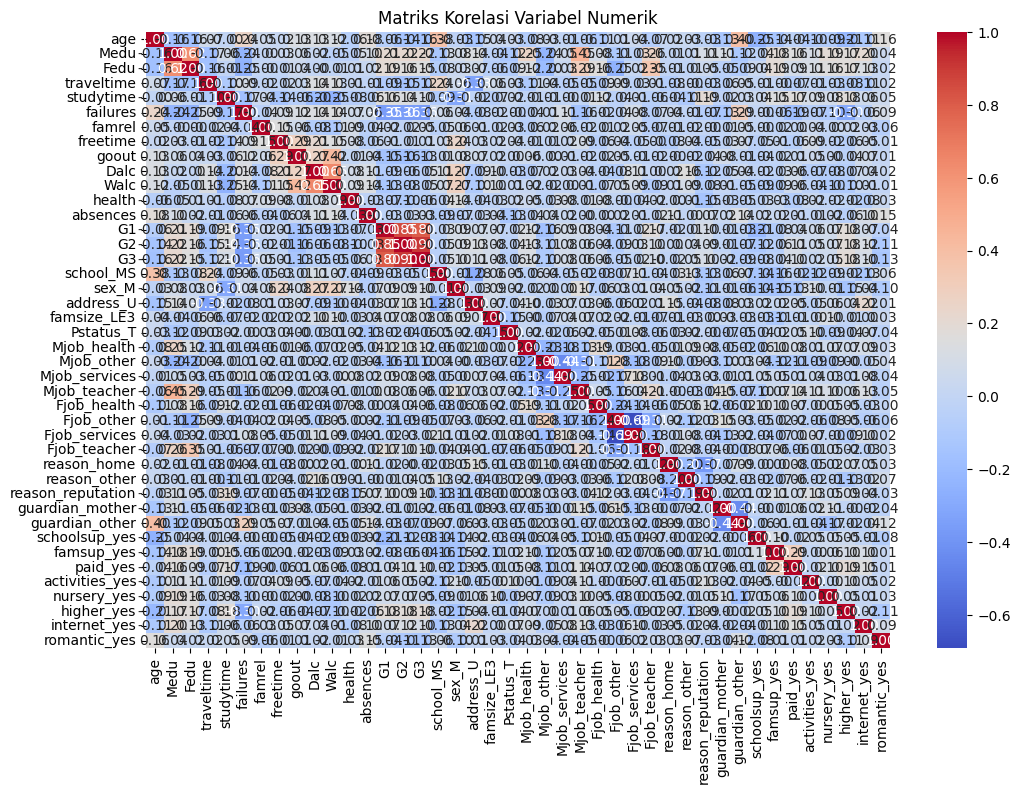

In [8]:
# Visualisasi Korelasi Antar-Variabel
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(df_scaled, columns=df_encoded.columns).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()


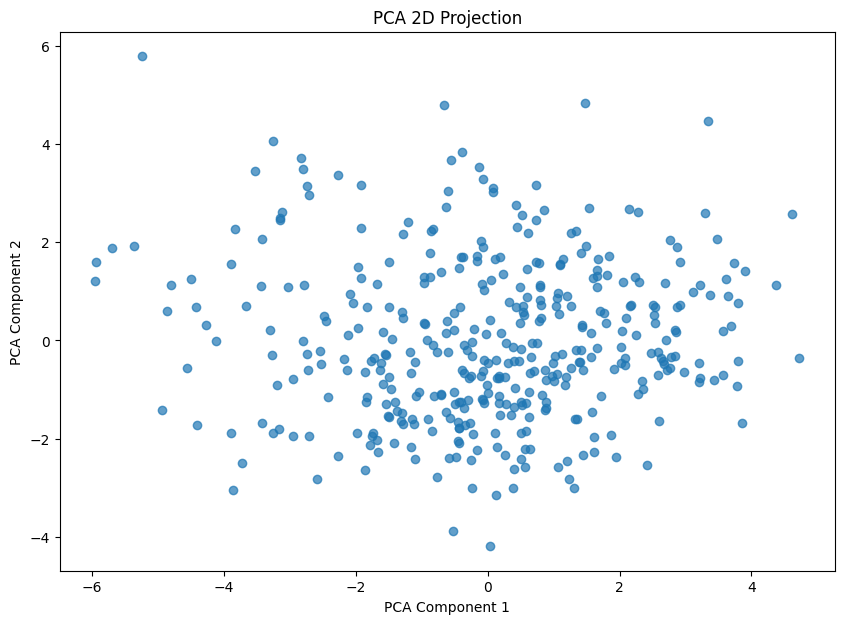

In [ ]:
# M emvisualisasikan data berdimensi tinggi dalam 2D.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Projection')
plt.show()


Pipeline Clustering

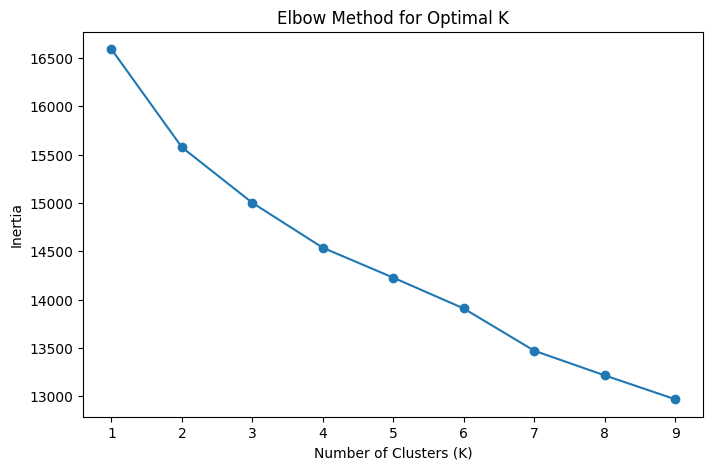

In [ ]:
# K-Means Clustering dengan metode Elbow
# Menentukan jumlah klaster optimal menggunakan metode Elbow
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# Silhouette Score untuk Validasi K-Means Clustering
# Pilih K yang optimal dan hitung silhouette score
optimal_k = 3  # misalnya dari Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette Score for K-Means with {optimal_k} clusters: {silhouette_avg:.4f}")


Silhouette Score for K-Means with 3 clusters: 0.0521


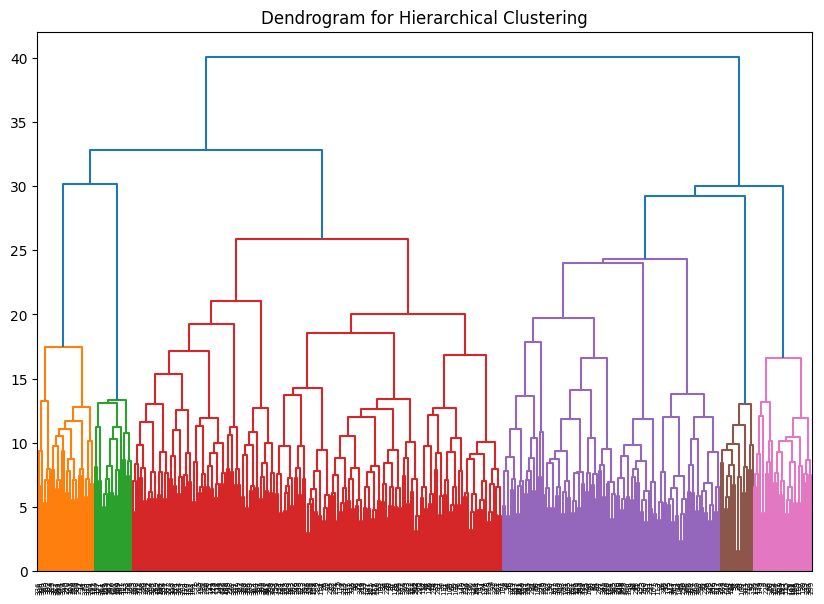

Silhouette Score for Hierarchical Clustering: 0.0426


In [ ]:
# Hierarchical Clustering dan Dendrogram
# Dendrogram untuk Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hier_labels = hierarchical.fit_predict(df_scaled)

# Evaluasi silhouette score untuk hierarchical
hier_silhouette = silhouette_score(df_scaled, hier_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hier_silhouette:.4f}")

In [ ]:
# DBSCAN Clustering
# Coba berbagai nilai parameter eps dan min_samples
eps_values = [0.2, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10]

best_silhouette = -1  # Untuk melacak silhouette terbaik
best_eps = None
best_min_samples = None
best_labels = None

# Loop untuk mencoba berbagai kombinasi eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = dbscan.fit_predict(df_scaled)

        # Hanya evaluasi jika lebih dari 1 cluster ditemukan
        if len(set(db_labels)) > 1:
            sil_score = silhouette_score(df_scaled, db_labels, metric='euclidean')
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) Silhouette Score: {sil_score:.4f}")

            # Update parameter terbaik jika skor silhouette lebih tinggi
            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = db_labels

# Menampilkan hasil terbaik
if best_silhouette > -1:
    print(f"\nBest DBSCAN Parameters:")
    print(f"  eps: {best_eps}")
    print(f"  min_samples: {best_min_samples}")
    print(f"  Silhouette Score: {best_silhouette:.4f}")
else:
    print("DBSCAN tidak menemukan cluster yang valid dengan parameter yang diberikan.")

DBSCAN tidak menemukan cluster yang valid dengan parameter yang diberikan.


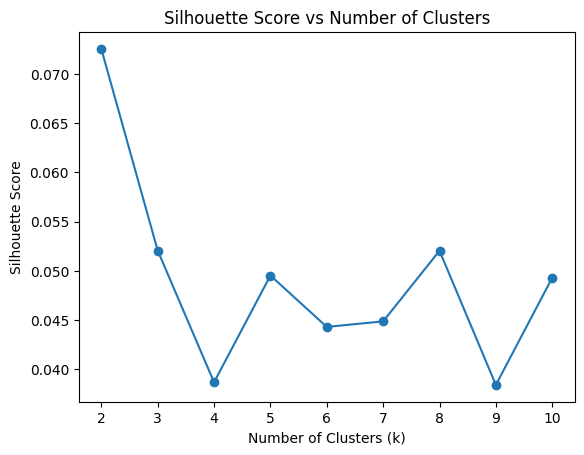

Optimal Number of Clusters: 2
Silhouette Score: 0.0725


In [ ]:
# K-Means Clustering
# Tentukan jumlah cluster optimal (k)
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_scaled, labels))

# Plot silhouette scores
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

# Model terbaik
optimal_k = k_values[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Silhouette Score: {max(sil_scores):.4f}")


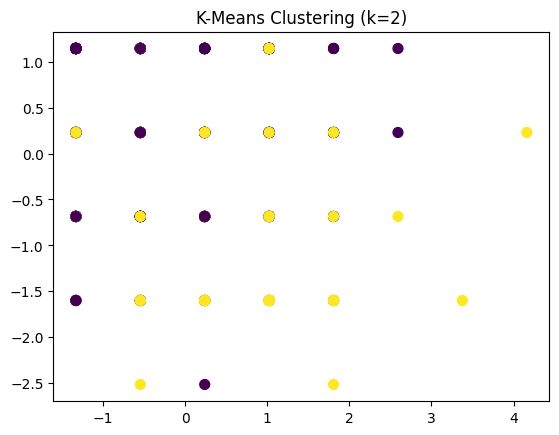

In [ ]:
# Evaluasi hasil clustering dengan Silhouette Score atau visualisasi scatter plot
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.show()


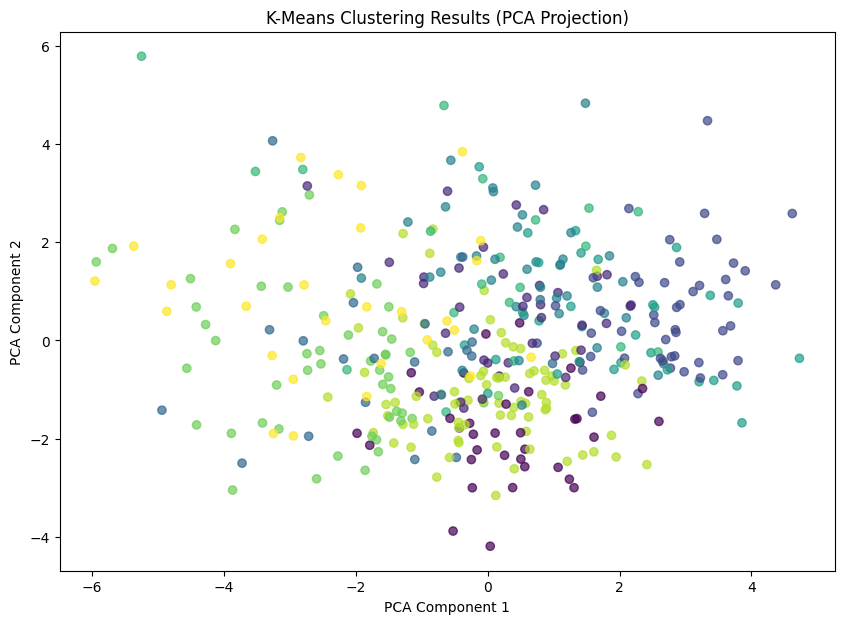

In [ ]:
# Visualisasi hasil K-Means Clustering
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
